In [2]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
basedir = os.path.abspath('')[:-8]

with open(os.path.join(basedir, 'datasets\\names.txt'), 'r', encoding='utf-8') as file:
    words = file.read().splitlines()

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [7]:
block_size = 3 # context length

X, Y = [], []

for word in words[:5]:
    context = [0] * block_size
    
    for char in word + '.':
        ix = stoi[char]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

... -----> e
..e -----> m
.em -----> m
emm -----> a
mma -----> .
... -----> o
..o -----> l
.ol -----> i
oli -----> v
liv -----> i
ivi -----> a
via -----> .
... -----> a
..a -----> v
.av -----> a
ava -----> .
... -----> i
..i -----> s
.is -----> a
isa -----> b
sab -----> e
abe -----> l
bel -----> l
ell -----> a
lla -----> .
... -----> s
..s -----> o
.so -----> p
sop -----> h
oph -----> i
phi -----> a
hia -----> .


In [8]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [9]:
C = torch.randn((27, 2))

In [11]:
embedding = C[X]
embedding

tensor([[[-1.3307, -1.3714],
         [-1.3307, -1.3714],
         [-1.3307, -1.3714]],

        [[-1.3307, -1.3714],
         [-1.3307, -1.3714],
         [-0.4471,  0.4396]],

        [[-1.3307, -1.3714],
         [-0.4471,  0.4396],
         [ 0.7805, -0.0560]],

        [[-0.4471,  0.4396],
         [ 0.7805, -0.0560],
         [ 0.7805, -0.0560]],

        [[ 0.7805, -0.0560],
         [ 0.7805, -0.0560],
         [ 0.2940,  0.6260]],

        [[-1.3307, -1.3714],
         [-1.3307, -1.3714],
         [-1.3307, -1.3714]],

        [[-1.3307, -1.3714],
         [-1.3307, -1.3714],
         [ 1.6728, -0.3697]],

        [[-1.3307, -1.3714],
         [ 1.6728, -0.3697],
         [ 0.7562,  0.8877]],

        [[ 1.6728, -0.3697],
         [ 0.7562,  0.8877],
         [-0.3107,  0.1143]],

        [[ 0.7562,  0.8877],
         [-0.3107,  0.1143],
         [ 0.9059,  0.2327]],

        [[-0.3107,  0.1143],
         [ 0.9059,  0.2327],
         [-0.3107,  0.1143]],

        [[ 0.9059,  0

As we can see single input to our nerual net will 3x2 size tensor, it is because we embeed single character into embedding of tensor 1x2. 

We can see that start/stop character is embedded into: '.' == [-1.3307, -1.3714]

In [17]:
W1 = torch.randn((6, 100))
b1 = torch.randn((100))

Since we cannot create dot product of tenser dim (32, 3, 2) with our layer which is (6, 100) we have to transform our tenser of embedding into such form that every word in represented as list of values.

In [22]:
#torch.cat(torch.unbind(embedding, 1), 1)

#more efficient method the same result
embedding.view(-1, 6)

tensor([[-1.3307, -1.3714, -1.3307, -1.3714, -1.3307, -1.3714],
        [-1.3307, -1.3714, -1.3307, -1.3714, -0.4471,  0.4396],
        [-1.3307, -1.3714, -0.4471,  0.4396,  0.7805, -0.0560],
        [-0.4471,  0.4396,  0.7805, -0.0560,  0.7805, -0.0560],
        [ 0.7805, -0.0560,  0.7805, -0.0560,  0.2940,  0.6260],
        [-1.3307, -1.3714, -1.3307, -1.3714, -1.3307, -1.3714],
        [-1.3307, -1.3714, -1.3307, -1.3714,  1.6728, -0.3697],
        [-1.3307, -1.3714,  1.6728, -0.3697,  0.7562,  0.8877],
        [ 1.6728, -0.3697,  0.7562,  0.8877, -0.3107,  0.1143],
        [ 0.7562,  0.8877, -0.3107,  0.1143,  0.9059,  0.2327],
        [-0.3107,  0.1143,  0.9059,  0.2327, -0.3107,  0.1143],
        [ 0.9059,  0.2327, -0.3107,  0.1143,  0.2940,  0.6260],
        [-1.3307, -1.3714, -1.3307, -1.3714, -1.3307, -1.3714],
        [-1.3307, -1.3714, -1.3307, -1.3714,  0.2940,  0.6260],
        [-1.3307, -1.3714,  0.2940,  0.6260,  0.9059,  0.2327],
        [ 0.2940,  0.6260,  0.9059,  0.2

In [23]:
h = torch.tanh(embedding.view(-1, 6)) @ W1 + b1

In [25]:
h.shape

torch.Size([32, 100])

In [26]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [27]:
logits = h @ W2 + b2

In [30]:
logits

tensor([[-2.7284e+01,  3.5230e+01, -6.1616e-01, -7.5942e+01, -4.5416e+00,
         -1.5480e+00, -4.3681e+00, -5.8932e+00,  1.2707e+01, -1.3209e+00,
         -2.7578e+00,  2.2155e+00, -3.3384e+01,  3.7354e+01,  3.1054e+01,
         -2.0524e+01,  8.3992e+00,  3.6128e+01, -3.2232e+01,  2.4364e+01,
          3.2212e+01,  2.0724e+01, -3.5523e+00,  3.7029e+01, -2.3817e+01,
         -4.5092e+01,  2.7186e+00],
        [-3.6752e+01,  2.4128e+01, -1.4302e+01, -4.1531e+01, -1.8487e+01,
          3.0386e+01, -7.1382e+00, -7.2264e+00,  1.4000e+01,  1.9112e+00,
         -8.8723e-01,  1.1040e+00, -3.1227e+01,  4.5709e+01,  2.4597e+01,
         -9.9323e+00,  1.2098e+00,  3.4131e+01, -1.4183e+01,  3.0550e+01,
          2.6021e+01,  3.3753e+01, -1.5887e+00,  2.2554e+01, -2.8495e+01,
         -3.8315e+01,  1.7211e+01],
        [-3.9632e+01,  1.9218e+01, -2.2329e+01,  1.8111e+01, -4.4967e+00,
          2.6254e+01,  8.0094e-01,  6.8276e+00,  1.9647e-01,  1.5077e+01,
          9.2402e+00,  3.3520e+00, -2.06

In [56]:
output = torch.nn.functional.softmax(logits, dim=1)
output[0].sum()

tensor(1.0000)

How to acces propability of correct character

In [57]:
output[torch.arange(32), Y]

tensor([5.9446e-18, 9.9998e-01, 3.5185e-10, 1.1349e-13, 5.7533e-09, 3.4101e-26,
        1.1610e-31, 4.9196e-29, 7.2389e-11, 8.5184e-04, 7.8386e-08, 3.5697e-02,
        5.5786e-02, 2.4006e-19, 6.3250e-12, 7.6007e-12, 7.4600e-18, 4.7507e-06,
        9.9999e-01, 2.7274e-25, 4.4442e-15, 5.0338e-23, 3.2432e-10, 3.5597e-19,
        5.8487e-09, 1.0653e-06, 1.5383e-27, 1.0934e-21, 2.3816e-09, 7.7098e-03,
        8.7111e-05, 2.5560e-09])

Error calculation

In [54]:
loss = -output[torch.arange(32), Y].log().mean()
loss

tensor(28.3146)

We can do all of this with CROSS ENTROPY!!!

In [55]:
torch.nn.functional.cross_entropy(logits, Y)

tensor(28.3146)

Lets create training workflow:

Creating dataset:

In [59]:
block_size = 3 # context length

X, Y = [], []

for word in words:
    context = [0] * block_size
    
    for char in word + '.':
        ix = stoi[char]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [60]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [64]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

print(sum(p.nelement() for p in parameters))

for p in parameters:
    p.requires_grad = True

3481


Learning rate

In [67]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [70]:
lri = []
losses = []

for i in range(1000):
    
    #minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    #forward pass
    embedding = C[X[ix]]
    h = torch.tanh(embedding.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = torch.nn.functional.cross_entropy(logits, Y[ix])
    print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    lri.append(lr)
    losses.append(loss.item())

    


6.624842643737793
4.742618560791016
6.996218681335449
6.260385990142822
6.648634910583496
7.564401626586914
5.953308582305908
6.6514458656311035
6.472318649291992
6.679840564727783
6.572617053985596
6.585281848907471
5.7058916091918945
6.171927452087402
6.659075736999512
5.101803779602051
5.5136637687683105
5.199660778045654
5.752209663391113
6.405574798583984
7.391951084136963
6.287118911743164
6.244791030883789
6.752723693847656
6.819032192230225
5.906014919281006
6.39262056350708
6.095521926879883
6.8013505935668945
6.4534735679626465
5.779541492462158
6.280528545379639
6.335846424102783
6.3199992179870605
6.195222854614258
5.538591384887695
5.7291646003723145
5.972784996032715
6.00809383392334
5.748807430267334
5.518581390380859
5.093550682067871
6.49700403213501
6.331797122955322
6.804255962371826
5.860227584838867
5.9104509353637695
5.928854465484619
5.566760063171387
5.432106018066406
6.800294399261475
5.638232231140137
6.4488043785095215
6.321974277496338
6.5874505043029785
5.3

RuntimeError: Numpy is not available

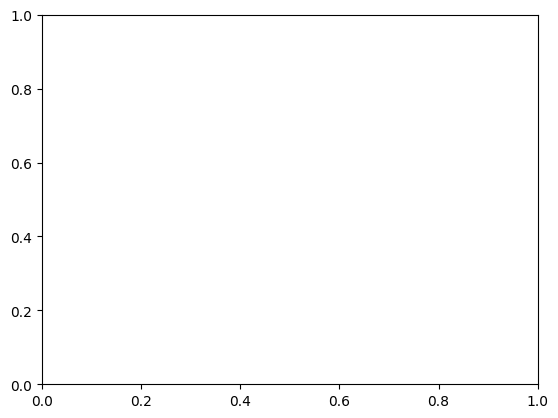

In [74]:
plt.plot(lri, losses)